In [1]:
from config import *

In [2]:
# Example: Download historical stock data
df = yf.download(tickers, start="2004-01-01", end="2024-01-01")['Adj Close']

[*********************100%***********************]  17 of 17 completed


In [3]:
df.rename(columns={col:col.replace('.MI','').replace('1','') for col in df.columns}, inplace=True)
df

Ticker,A2A,CPR,ENEL,ENI,G,ISP,LDO,MB,MONC,PIRC,PRY,PST,SPM,TEN,TIT,TRN,UCG
Date,,,,,,,,,,,,,,,,,
2004-01-01 00:00:00+00:00,0.565195,0.752704,1.228324,4.252551,9.164811,1.028646,NaN,3.966996,NaN,NaN,NaN,NaN,16.534714,1.412777,1.348909,NaN,64.064354
2004-01-02 00:00:00+00:00,0.580916,0.756614,1.244277,4.377624,8.450670,0.990293,NaN,3.804450,NaN,NaN,NaN,NaN,16.947435,1.415463,1.397699,NaN,65.261826
2004-01-05 00:00:00+00:00,0.573247,0.762479,1.264787,4.397523,8.522084,0.974474,NaN,3.822023,NaN,NaN,NaN,NaN,16.792669,1.485296,1.412050,NaN,65.561203
2004-01-06 00:00:00+00:00,0.576315,0.761502,1.276181,4.377624,8.526051,0.977637,NaN,3.830809,NaN,NaN,NaN,NaN,16.844255,1.590045,1.449360,NaN,65.561203
2004-01-07 00:00:00+00:00,0.563661,0.758569,1.264787,4.244021,8.526051,0.911196,NaN,3.822023,NaN,NaN,NaN,NaN,16.483122,1.520212,1.449360,NaN,64.064354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21 00:00:00+00:00,1.773474,10.115137,6.252772,14.459040,18.103134,2.523935,14.502009,10.762495,55.249077,4.682784,40.124859,9.771624,1.444500,15.573477,0.300900,7.381000,23.095987
2023-12-22 00:00:00+00:00,1.770617,10.139965,6.294932,14.542749,18.174276,2.540249,14.566199,10.868814,54.993748,4.692443,40.341805,9.805057,1.446500,15.646614,0.300100,7.381000,23.171898
2023-12-27 00:00:00+00:00,1.762045,10.189623,6.296806,14.683535,18.254906,2.549366,14.689642,10.839818,54.954468,4.702103,40.667225,9.838488,1.487500,15.646614,0.300700,7.338302,23.200365


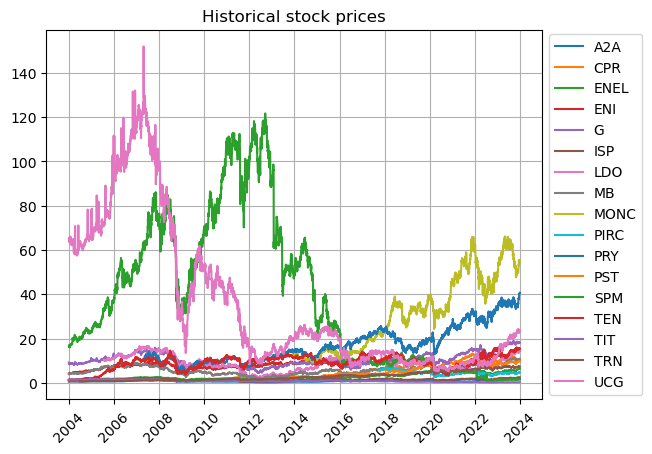

In [4]:
for col in df.columns:
    plt.plot(df.index,df[col], label=col, zorder=3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True,zorder=0)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # Every 2 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.title('Historical stock prices')
plt.show()

All time series are complete after their start date

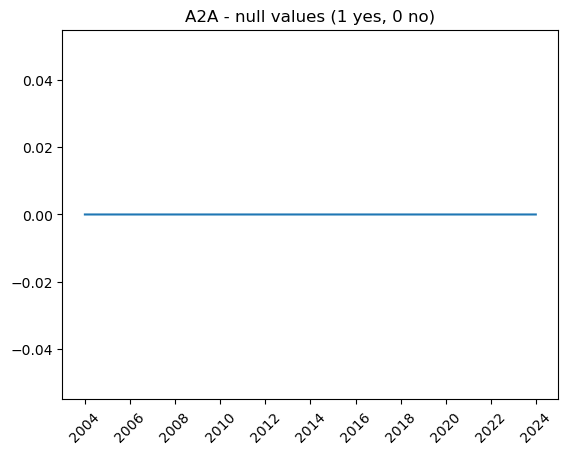

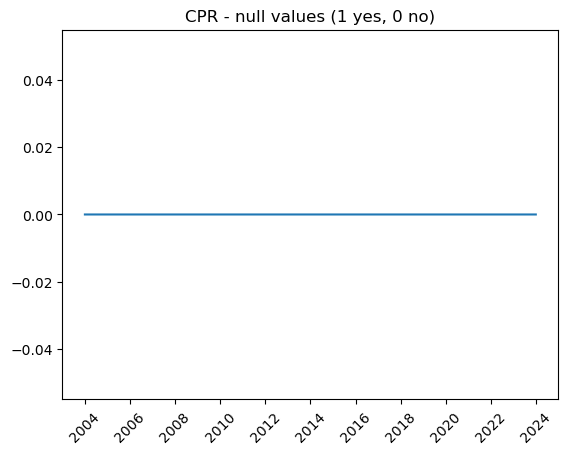

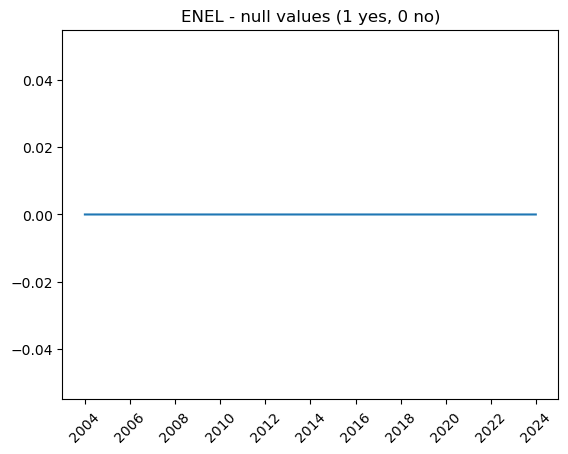

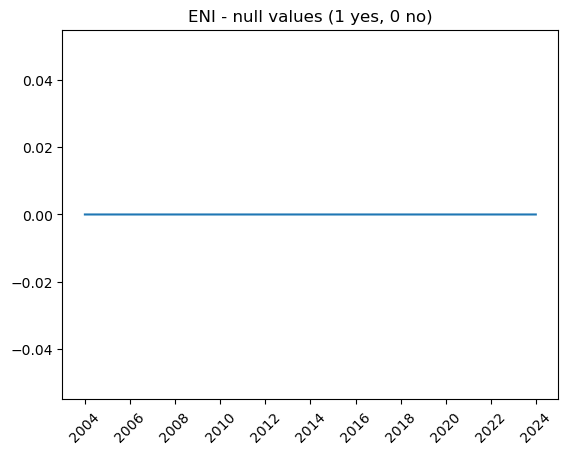

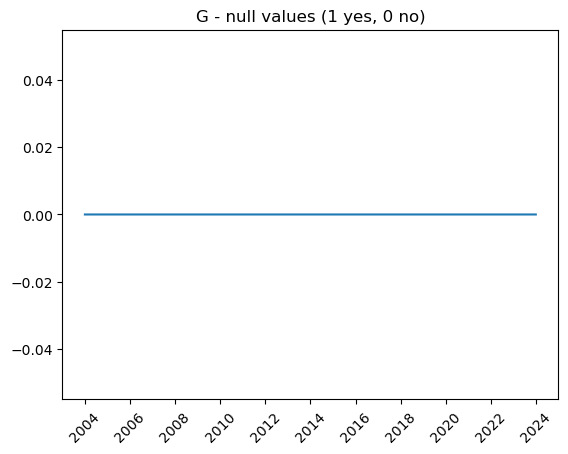

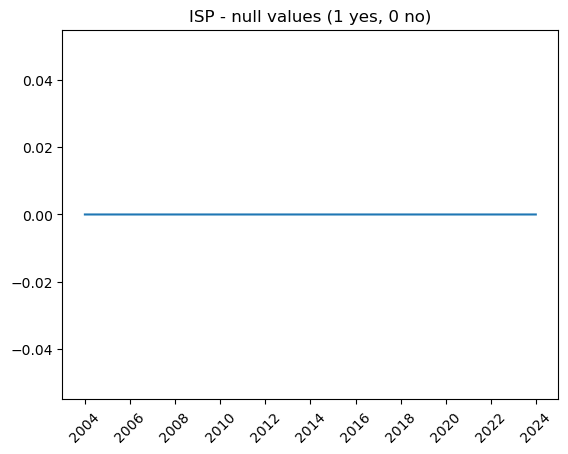

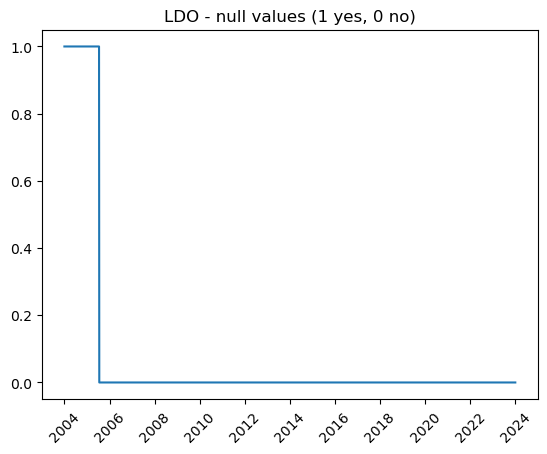

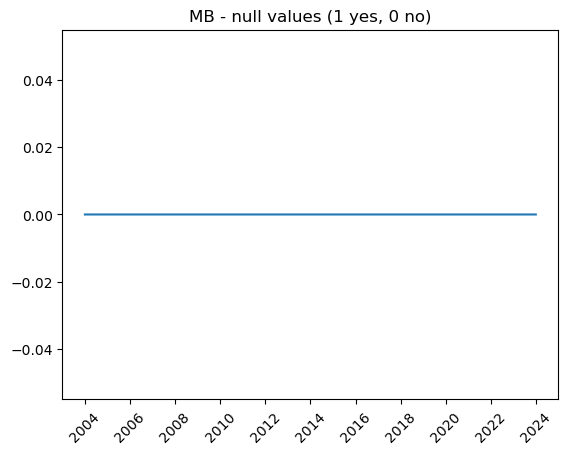

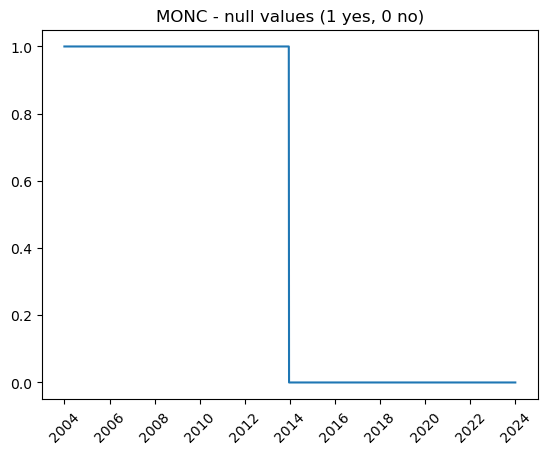

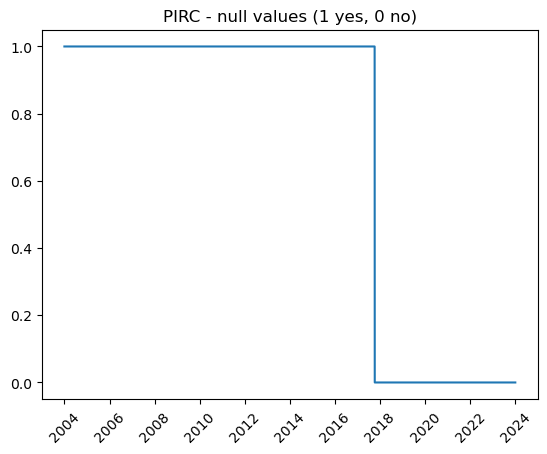

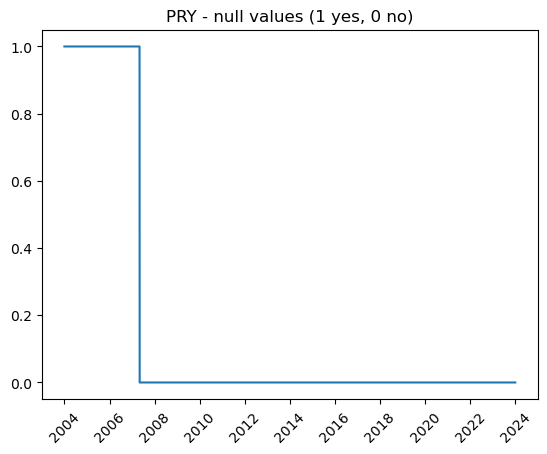

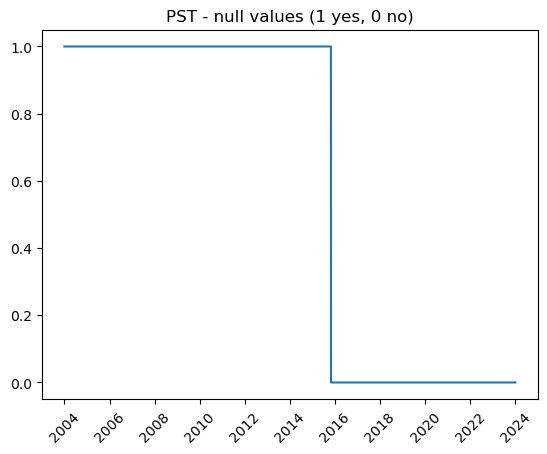

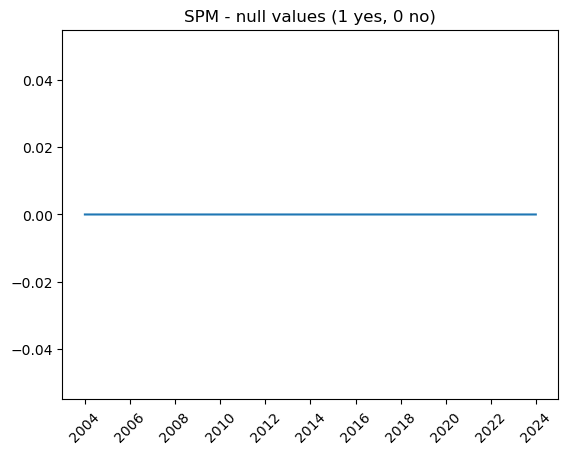

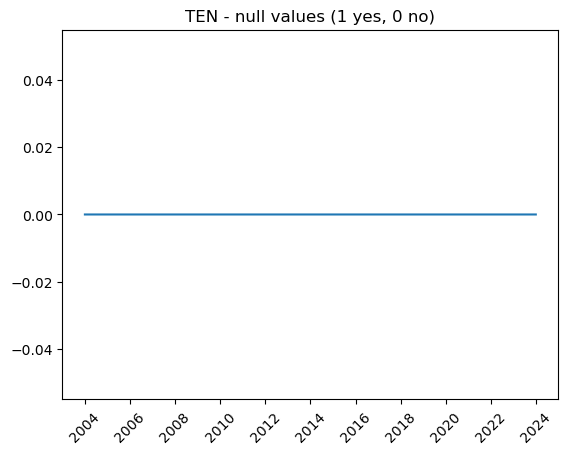

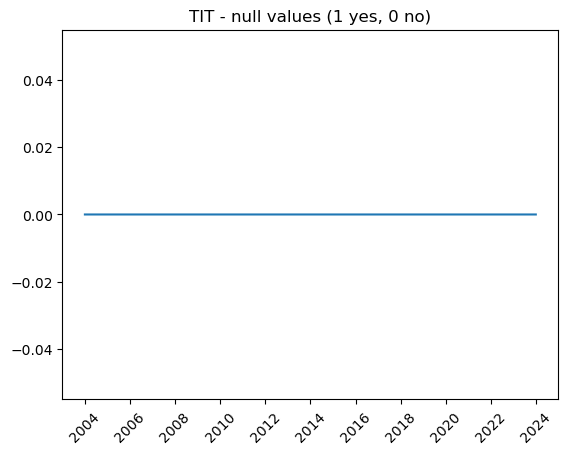

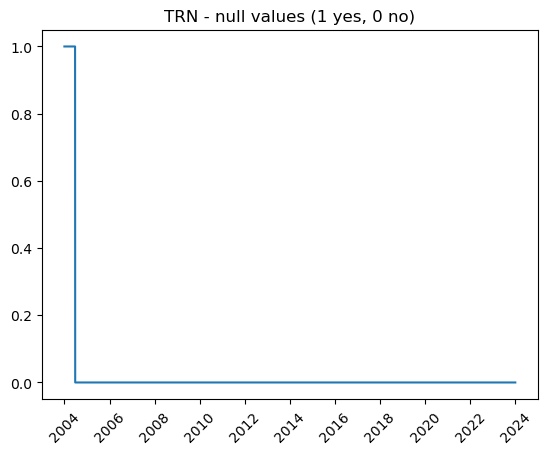

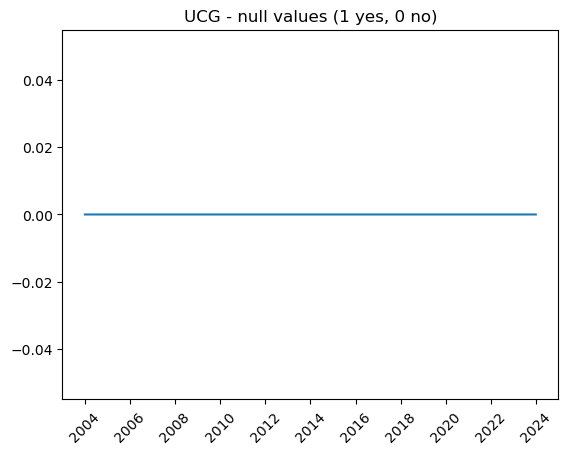

In [5]:
for col in df.columns:
    series = np.where(pd.isnull(df[col]),1,0)
    plt.plot(df.index,series)
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # Every 2 years
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.title(f'{col} - null values (1 yes, 0 no)')
    plt.show()

In [6]:
df.to_csv('data/italian_stock_data_2004_2024.csv')